<a href="https://colab.research.google.com/github/VadimSV08/myprojects/blob/main/Application%20of%20ML%20models%20for%20iris%20dataframe/ML_models_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
# Импорт библиотек
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение датасета из файла csv
!gdown --id 1vYRrRhMNhIRfJysuOva1BJXk_1N2_J1J
df = pd.read_csv('iris.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vYRrRhMNhIRfJysuOva1BJXk_1N2_J1J
To: /content/iris.csv
100% 3.26k/3.26k [00:00<00:00, 3.48MB/s]


# Первичный взгляд на датафрейм

In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


Как видно выше, пустые значения отсутствуют. Species - целевая переменная, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm - атрибуты.

Значения Species (Вид цветка) заранее закодированы для дальнейшей обработки. Взглянем на ее уникальные значения: 

In [4]:
df.Species.unique()

array([0, 1, 2])

Числовым значениям соответствуют следующие виды цветов: 
* 0 - Setosa
* 1 - Versicolor
* 2 - Virginica

Далее, мы убираем ненужные признаки - id:
* axis=1 - убираем всю колонку целиком;
* inplace=True - производим изменения в df, не создавая новый объект.

In [5]:
df.drop('Id',axis=1,inplace=True) 

In [6]:
df.shape

(150, 5)

# Разведочный анализ

## Таргет

Оценим распределение целевой переменной на предмет перекоса значений

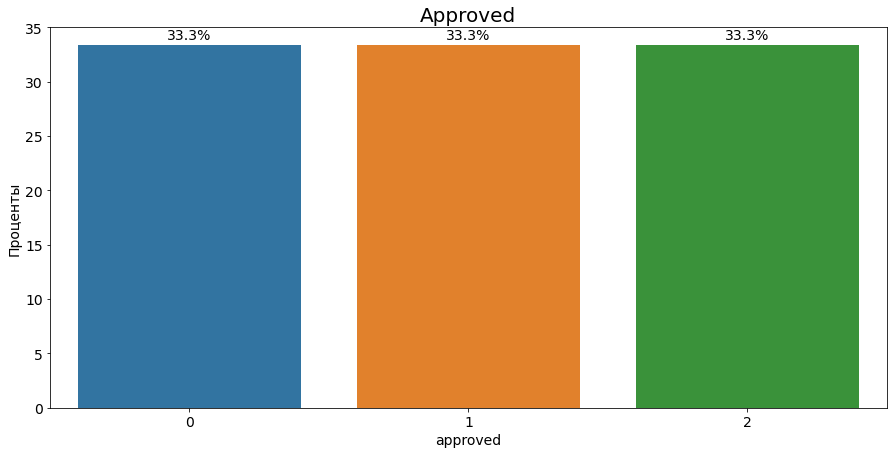

In [7]:
# нормирование на размер датасета
norm_target = (df
               .Species
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Approved', fontsize=20)

plt.xlabel('approved', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Отношение длины к ширине

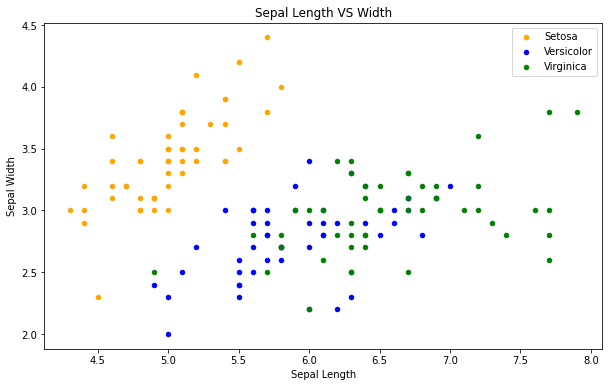

In [8]:
fig = df[df.Species==0].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species==1].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax=fig)
df[df.Species==2].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


График показывает отношение между длиной и шириной чашелистика цветка. Setosa показывает лучшее групповое разделение, чем две другие разновидности. Посмотрим на отношение между длиной и шириной у лепестков. 

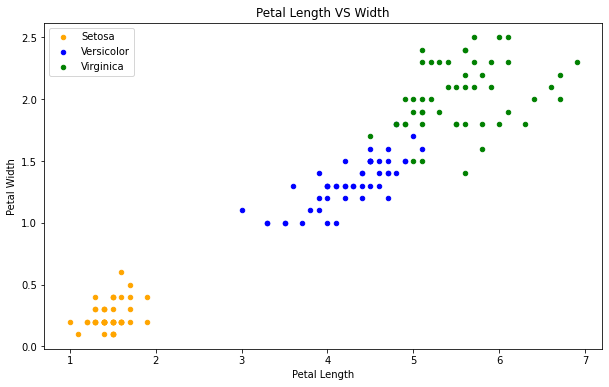

In [9]:
fig = df[df.Species==0].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species==1].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig)
df[df.Species==2].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Для признаков лепестка наблюдается более лучшее групповое разделение в сравнении с чашелистиком. Это говорит о том, что за счет признаков лепестка можно сформировать более точный прогноз по сравнению с признаками чашелистика.

## Распределение длины и ширины

Взглянем на то, как распределены длина и ширина у листков и чашелистиков.

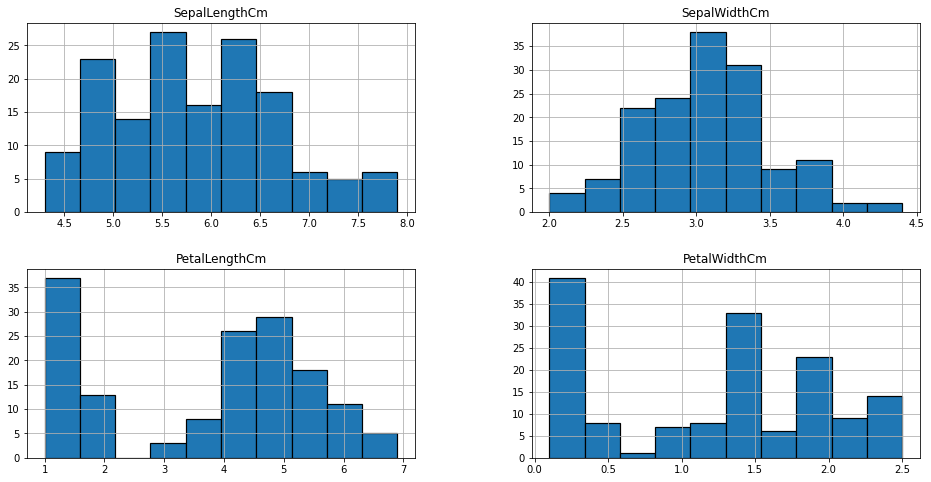

In [10]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

Оценим как длина и ширина варьируются в зависимости от вида

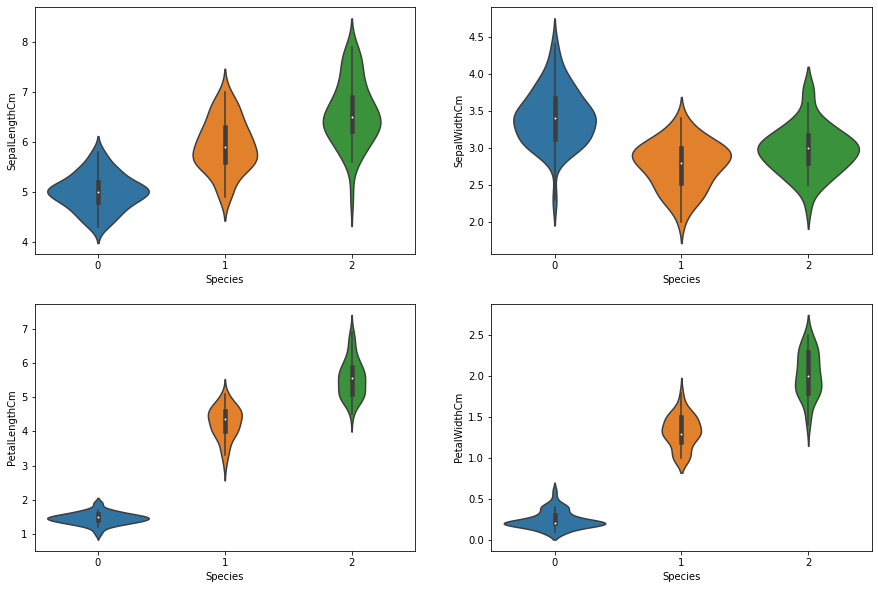

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)

График показывает плотность распределения длины и ширины у вариаций цветков. Чем шире "скрипка" - тем плотнее распределены значения, чем уже - тем менее плотное распределение.

# Обучение модели

Импортируем необходимые библиотеки для различных алгоритмов классификации

In [12]:
from sklearn.linear_model import LogisticRegression  # Для реализации алгоритма  логистической регрессии
from sklearn.model_selection import train_test_split # Для разбиения датасета на train и test
from sklearn.neighbors import KNeighborsClassifier # Алгоритм K ближайших соседей
from sklearn import svm  # Для реализации алгоритма  Метод Опорных Векторов (Support Vector Method)
from sklearn import metrics # Для проверки точности модели
from sklearn.tree import DecisionTreeClassifier # Для реализации алгоритма Деревья решений 

## Оценка корреляции

Точность модели может быть снижена ввиду корреляции признаков. Оценим степень корреляции с помощью тепловой карты

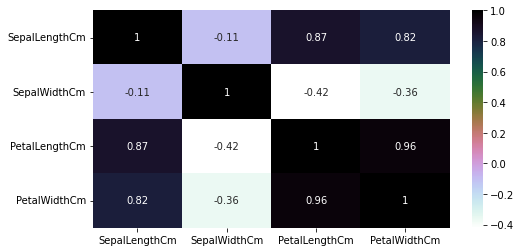

In [13]:
plt.figure(figsize=(8,4))
# матрица корреляции 
sns.heatmap(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].
            corr(),annot=True,cmap='cubehelix_r')
plt.show()


Как видно из матрицы ширина и длина чашелистика не коррелированы, а длина и ширина лепестка - имеют высокую степень корреляции.

## Разделение датасета на тренирующую и тестировочную часть

Ниже представлено разделение датасета на тренирующую и тестировочную части, атрибут test_size=0.3 отвечает за разделение датасета на составляющие: 30% - test, 70% - train.

In [14]:
train, test = train_test_split(df, test_size=0.3)

Проверим корректность разбиения датасета:

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 137 to 32
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  105 non-null    float64
 1   SepalWidthCm   105 non-null    float64
 2   PetalLengthCm  105 non-null    float64
 3   PetalWidthCm   105 non-null    float64
 4   Species        105 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.9 KB


In [16]:
train.shape

(105, 5)

In [17]:
test.shape

(45, 5)

Создадим переменные, куда будут помещены признаки и целевая переменная для обучающей выборки тестировочной:

In [18]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_Y = train.Species
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_Y = test.Species

## Совместное использование признаков при обучении и тестрированни моделей

### Метод Опорных Векторов (Support Vector Method)

In [19]:
# Создание объекта алгоритма
model = svm.SVC()
# Обучение алгоритма на тренировочных данных 
model.fit(train_X, train_Y)
# Обработка тестировочных данных через обученный алгоритм
prediction = model.predict(test_X)
print('The accuracy of the SVM is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the SVM is 0.9777777777777777


### Логистическая регрессия

In [20]:
# Создание объекта алгоритма
model = LogisticRegression()
# Обучение алгоритма на тренировочных данных
model.fit(train_X, train_Y)
# Обработка тестировочных данных через обученный алгоритм
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Logistic Regression is 1.0


### Деревья решений

In [21]:
# Создание объекта алгоритма
model = DecisionTreeClassifier()
# Обучение алгоритма на тренировочных данных
model.fit(train_X, train_Y)
# Обработка тестировочных данных через обученный алгоритм
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Decision Tree is 0.9555555555555556


### K-ближайших соседей

In [22]:
# Создание объекта алгоритма
model = KNeighborsClassifier(n_neighbors=6)
# Обучение алгоритма на тренировочных данных
model.fit(train_X, train_Y)
# Обработка тестировочных данных через обученный алгоритм
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Decision Tree is 1.0


Оценим влияние изменение значения параметра n_neighbors ( количество соседей для помещения данных в новый класс) на точность работы алгоритма

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f9d9a346c10>,
 <a list of 10 Text major ticklabel objects>)

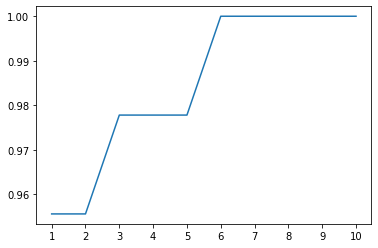

In [23]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)

Выше представлен график, показывающий точность модели K-ближайших соседей в зависимости от значения параметра n_neighbors

## Раздельное использование признаков при обучении и тестрированни моделей

Создадим отдельные датасеты для чашелистиков и лепестков

In [24]:
petal = df[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

Проведем два процесса обучения для двух наборов данных

In [25]:
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)
train_X_p = train_p[['PetalLengthCm', 'PetalWidthCm']]
train_Y_p = train_p.Species
test_X_p = test_p[['PetalLengthCm', 'PetalWidthCm']]
test_Y_p = test_p.Species


train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_X_s = train_s[['SepalLengthCm', 'SepalWidthCm']]
train_Y_s = train_s.Species
test_X_s = test_s[['SepalLengthCm', 'SepalWidthCm']]
test_Y_s = test_s.Species

### Метод Опорных Векторов (Support Vector Method)

In [26]:
model = svm.SVC()
model.fit(train_X_p, train_Y_p)
prediction = model.predict(test_X_p)
print('The accuracy of the SVM is', metrics.accuracy_score(prediction, test_Y_p))

model = svm.SVC()
model.fit(train_X_s, train_Y_s)
prediction = model.predict(test_X_s)
print('The accuracy of the SVM is', metrics.accuracy_score(prediction, test_Y_s))

The accuracy of the SVM is 0.9777777777777777
The accuracy of the SVM is 0.8


### Логистическая регрессия

In [27]:
model = LogisticRegression()
model.fit(train_X_p, train_Y_p)
prediction = model.predict(test_X_p)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_Y_p))

model = LogisticRegression()
model.fit(train_X_s, train_Y_s)
prediction = model.predict(test_X_s)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_Y_s))

The accuracy of the Logistic Regression is 0.9777777777777777
The accuracy of the Logistic Regression is 0.8222222222222222


### Деревья решений

In [28]:
model = DecisionTreeClassifier()
model.fit(train_X_p, train_Y_p)
prediction = model.predict(test_X_p)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_Y_p))

model = DecisionTreeClassifier()
model.fit(train_X_s, train_Y_s)
prediction = model.predict(test_X_s)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_Y_s))

The accuracy of the Decision Tree is 0.9555555555555556
The accuracy of the Decision Tree is 0.6444444444444445


### K-ближайших соседей

In [29]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X_p, train_Y_p)
prediction = model.predict(test_X_p)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_Y_p))

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X_s, train_Y_s)
prediction = model.predict(test_X_s)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_Y_s))

The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.7333333333333333


The accuracy of the KNN is 0.9555555555555556
The accuracy of the KNN is 0.9555555555555556
The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.9555555555555556
The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.9777777777777777
The accuracy of the KNN is 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f9d9a3d4ed0>,
 <a list of 10 Text major ticklabel objects>)

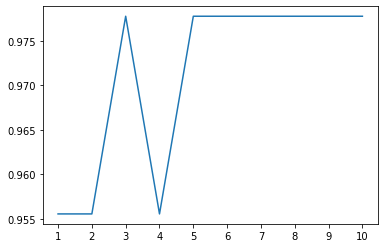

In [30]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X_p, train_Y_p)
    prediction = model.predict(test_X_p)
    print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_Y_p))
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y_p)))
plt.plot(a_index, a)
plt.xticks(x)

The accuracy of the KNN is 0.7111111111111111
The accuracy of the KNN is 0.7333333333333333
The accuracy of the KNN is 0.7333333333333333
The accuracy of the KNN is 0.8222222222222222
The accuracy of the KNN is 0.7333333333333333
The accuracy of the KNN is 0.7555555555555555
The accuracy of the KNN is 0.7333333333333333
The accuracy of the KNN is 0.7333333333333333
The accuracy of the KNN is 0.7333333333333333
The accuracy of the KNN is 0.7333333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f9d94d77450>,
 <a list of 10 Text major ticklabel objects>)

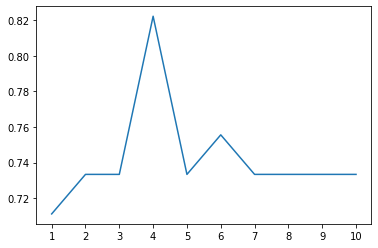

In [31]:
b_index=list(range(1,11))
b=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in b_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X_s, train_Y_s)
    prediction = model.predict(test_X_s)
    print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_Y_s))
    b=b.append(pd.Series(metrics.accuracy_score(prediction,test_Y_s)))
plt.plot(b_index, b)
plt.xticks(x)

# Выводы

* Использование признаков, характеризующих лепесток, дает более высокое значение точности при обработке значений алгоритмами 